In [1]:
from google.protobuf import text_format
from ffn.inference import inference
from ffn.inference import inference_pb2

/home/hzh/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
config = '''image {
  hdf5: "third_party/neuroproof_examples/training_sample2/grayscale_maps.h5:raw"
}
image_mean: 128
image_stddev: 33
checkpoint_interval: 1800
seed_policy: "PolicyPeaks"
model_checkpoint_path: "models/fib25/model.ckpt-27465036"
model_name: "convstack_3d.ConvStack3DFFNModel"
model_args: "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"
segmentation_output_dir: "results/fib25/training2"
inference_options {
  init_activation: 0.95
  pad_value: 0.05
  move_threshold: 0.9
  min_boundary_dist { x: 1 y: 1 z: 1}
  segment_threshold: 0.6
  min_segment_size: 1000
}'''
req = inference_pb2.InferenceRequest()
_ = text_format.Parse(config, req)

In [4]:
runner = inference.Runner()
runner.start(req)
canvas, alignment = runner.make_canvas((0, 0, 0), (250, 250, 250))

INFO:root:Available TF devices: [_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456), _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 7260232090)]
INFO:root:Importing symbol ConvStack3DFFNModel from ffn.training.models.convstack_3d
INFO:root:Loading checkpoint.


INFO:tensorflow:Restoring parameters from models/fib25/model.ckpt-27465036


INFO:tensorflow:Restoring parameters from models/fib25/model.ckpt-27465036
INFO:root:Checkpoint loaded.
INFO:root:Executor starting.
INFO:root:Process subvolume: (0, 0, 0)
INFO:root:Requested bounds are (0, 0, 0) + (250, 250, 250)
INFO:root:Destination bounds are (0, 0, 0) + (250, 250, 250)
INFO:root:Fetch bounds are array([0, 0, 0]) + array([250, 250, 250])
INFO:root:Fetched image of size (250, 250, 250) prior to transform
INFO:root:Image data loaded, shape: (250, 250, 250).
INFO:root:Registered as client 0.
INFO:root:client 0 starting


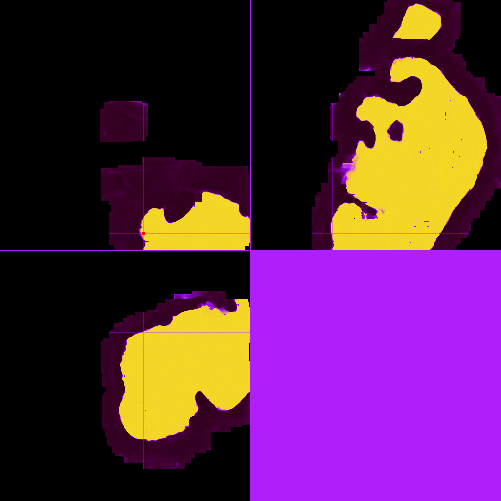

6357

In [5]:
# Create a single segment, starting from the specified origin point.
canvas.segment_at((125, 125, 125),  # zyx
                  dynamic_image=inference.DynamicImage(),
                  vis_update_every=1)